In [33]:
# 데이터 도구
import numpy as np
import pandas as pd

# 시각화 도구
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [34]:
# 사전 출력 세팅
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_row', 500)

# 데이터 불러오기

In [35]:
# 데이터 불러오기
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
submission = pd.read_csv('./datasets/sample_submission.csv')

## 데이터 확인

In [36]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [37]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [38]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [39]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

# 탐색적 분석 EDA

## 데이터 셋 기본정보 확인

In [40]:
train.info()
test.info()
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일

In [41]:
def to_datetime(df):
    temp_df = df.copy()
    temp_df['일자'] = pd.to_datetime(df['일자'])
    return temp_df
    
def set_index(df):
    temp_df = df.copy()
    df.set_index('일자',inplace=True)  
    return temp_df

train = to_datetime(train)
test = to_datetime(test)
submission = to_datetime(submission)

## 수치 데이터 편중 확인

In [44]:
numerical_cols = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
        '현본사소속재택근무자수', '중식계', '석식계']

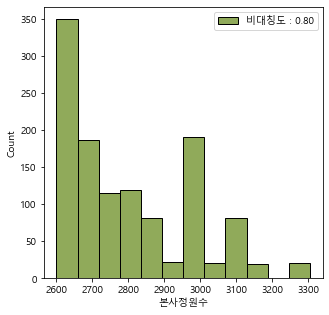

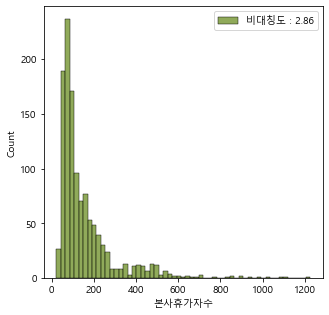

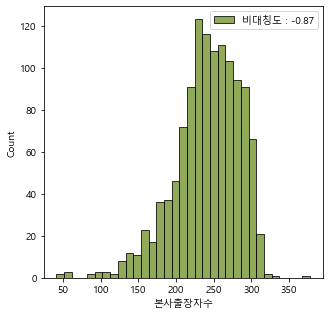

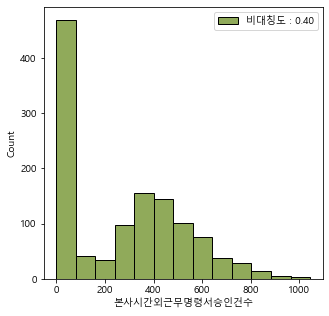

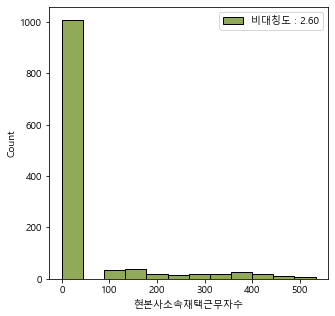

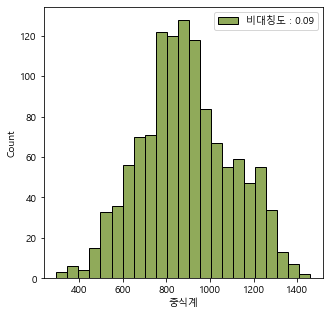

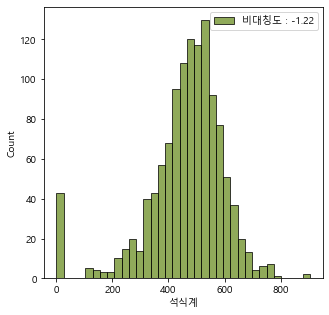

In [45]:
# plt 한글 출력
font_path = "C:/Windows/Fonts/Malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 컬럼마다 hist plot그리기
for col in numerical_cols: 
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    g = sns.histplot(train[col], color='olivedrab', label='비대칭도 : {:.2f}'.format(train[col].skew()), ax=ax)
    g = g.legend(loc='best')
    

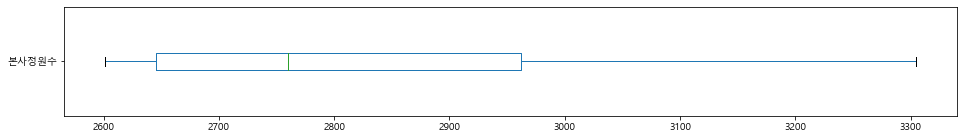

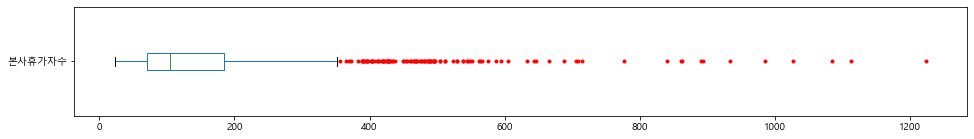

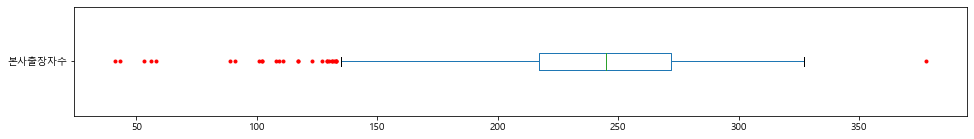

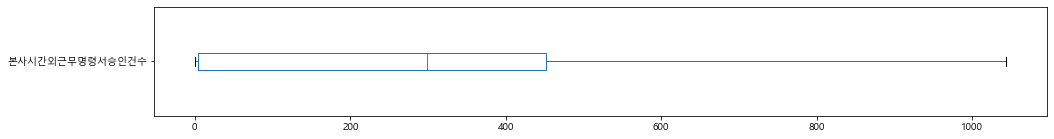

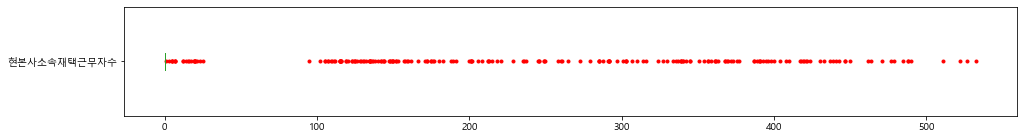

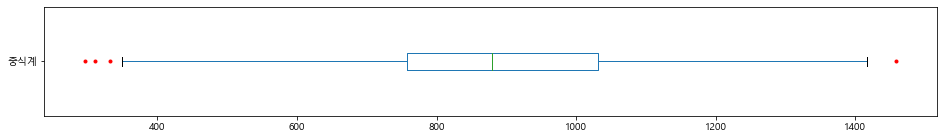

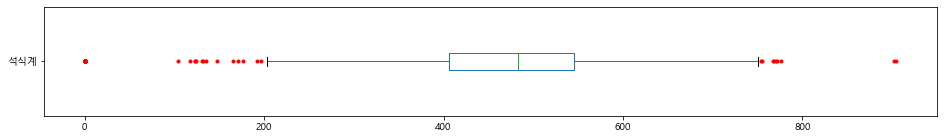

In [46]:
# box plot
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')

for col in numerical_cols:
    train[col].plot(kind='box', vert=False, flierprops=red_square, figsize=(16,2))
    plt.show()

해야할 것
편중된 데이터 잘라내기(ex: 휴가자수 넘친날, 석식 0인 날)
조식/중식/석식 메뉴 데이터 확인 
컬럼을 메뉴 특징별(메인 서브 디저트)로 새로만들까 고민
카테고리 범위 축소와 토크나이징

상관관계 확인 hitmap 혹은 산점도


In [ ]:
 # news exam 토크나이징 참고해서 수정할 함수
 
 
 def preprocess(df):

    temp_df = df.copy()

    # 광범위한 범주 축소
    def recode_prop(value):
        if value not in ['', '', '' ]:     
            return '기타 메뉴'
        return value

    temp_df[['조식메뉴', '중식메뉴', '석식메뉴'] = temp_df['조식메뉴', '중식메뉴', '석식메뉴'].apply(recode_prop)


    #범주형 데이터들 인코딩
    def Encode(df):
        for column in df.columns[df.columns.isin([' ', ' ', ' '])]:
            df[column] = df[column].factorize()[0] #factorize 범주형 
        return df
    
    temp_df = Encode(temp_df)

    return temp_df